#Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score,roc_curve,roc_auc_score
import copy


#Read Data

In [2]:
df2=pd.read_csv("data.csv")
df=copy.deepcopy(df2)
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

#Exploratory Data Analysis (EDA)

In [4]:
#Return information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#data type of the DataFrame
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
#Shape of data
df.shape

(569, 33)

In [7]:
#Displaying (min,max,mean ,std) for all the numeric columns
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [8]:
#check the null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
#check the uniuque elements for the categorical features (diagnosis)
dia_c = df['diagnosis'].unique()
print(dia_c)
df['diagnosis'].value_counts()

['M' 'B']


B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
#Check how many uniqeue elements there ara
df['diagnosis'].nunique()

2

In [11]:
# Check if there are any duplicated rows in the data
df.duplicated().sum()

0

In [12]:
#Remove unnecessary columns of the data
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)
df.head(5)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

#Visualization

<ipython-input-13-51686b31339b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


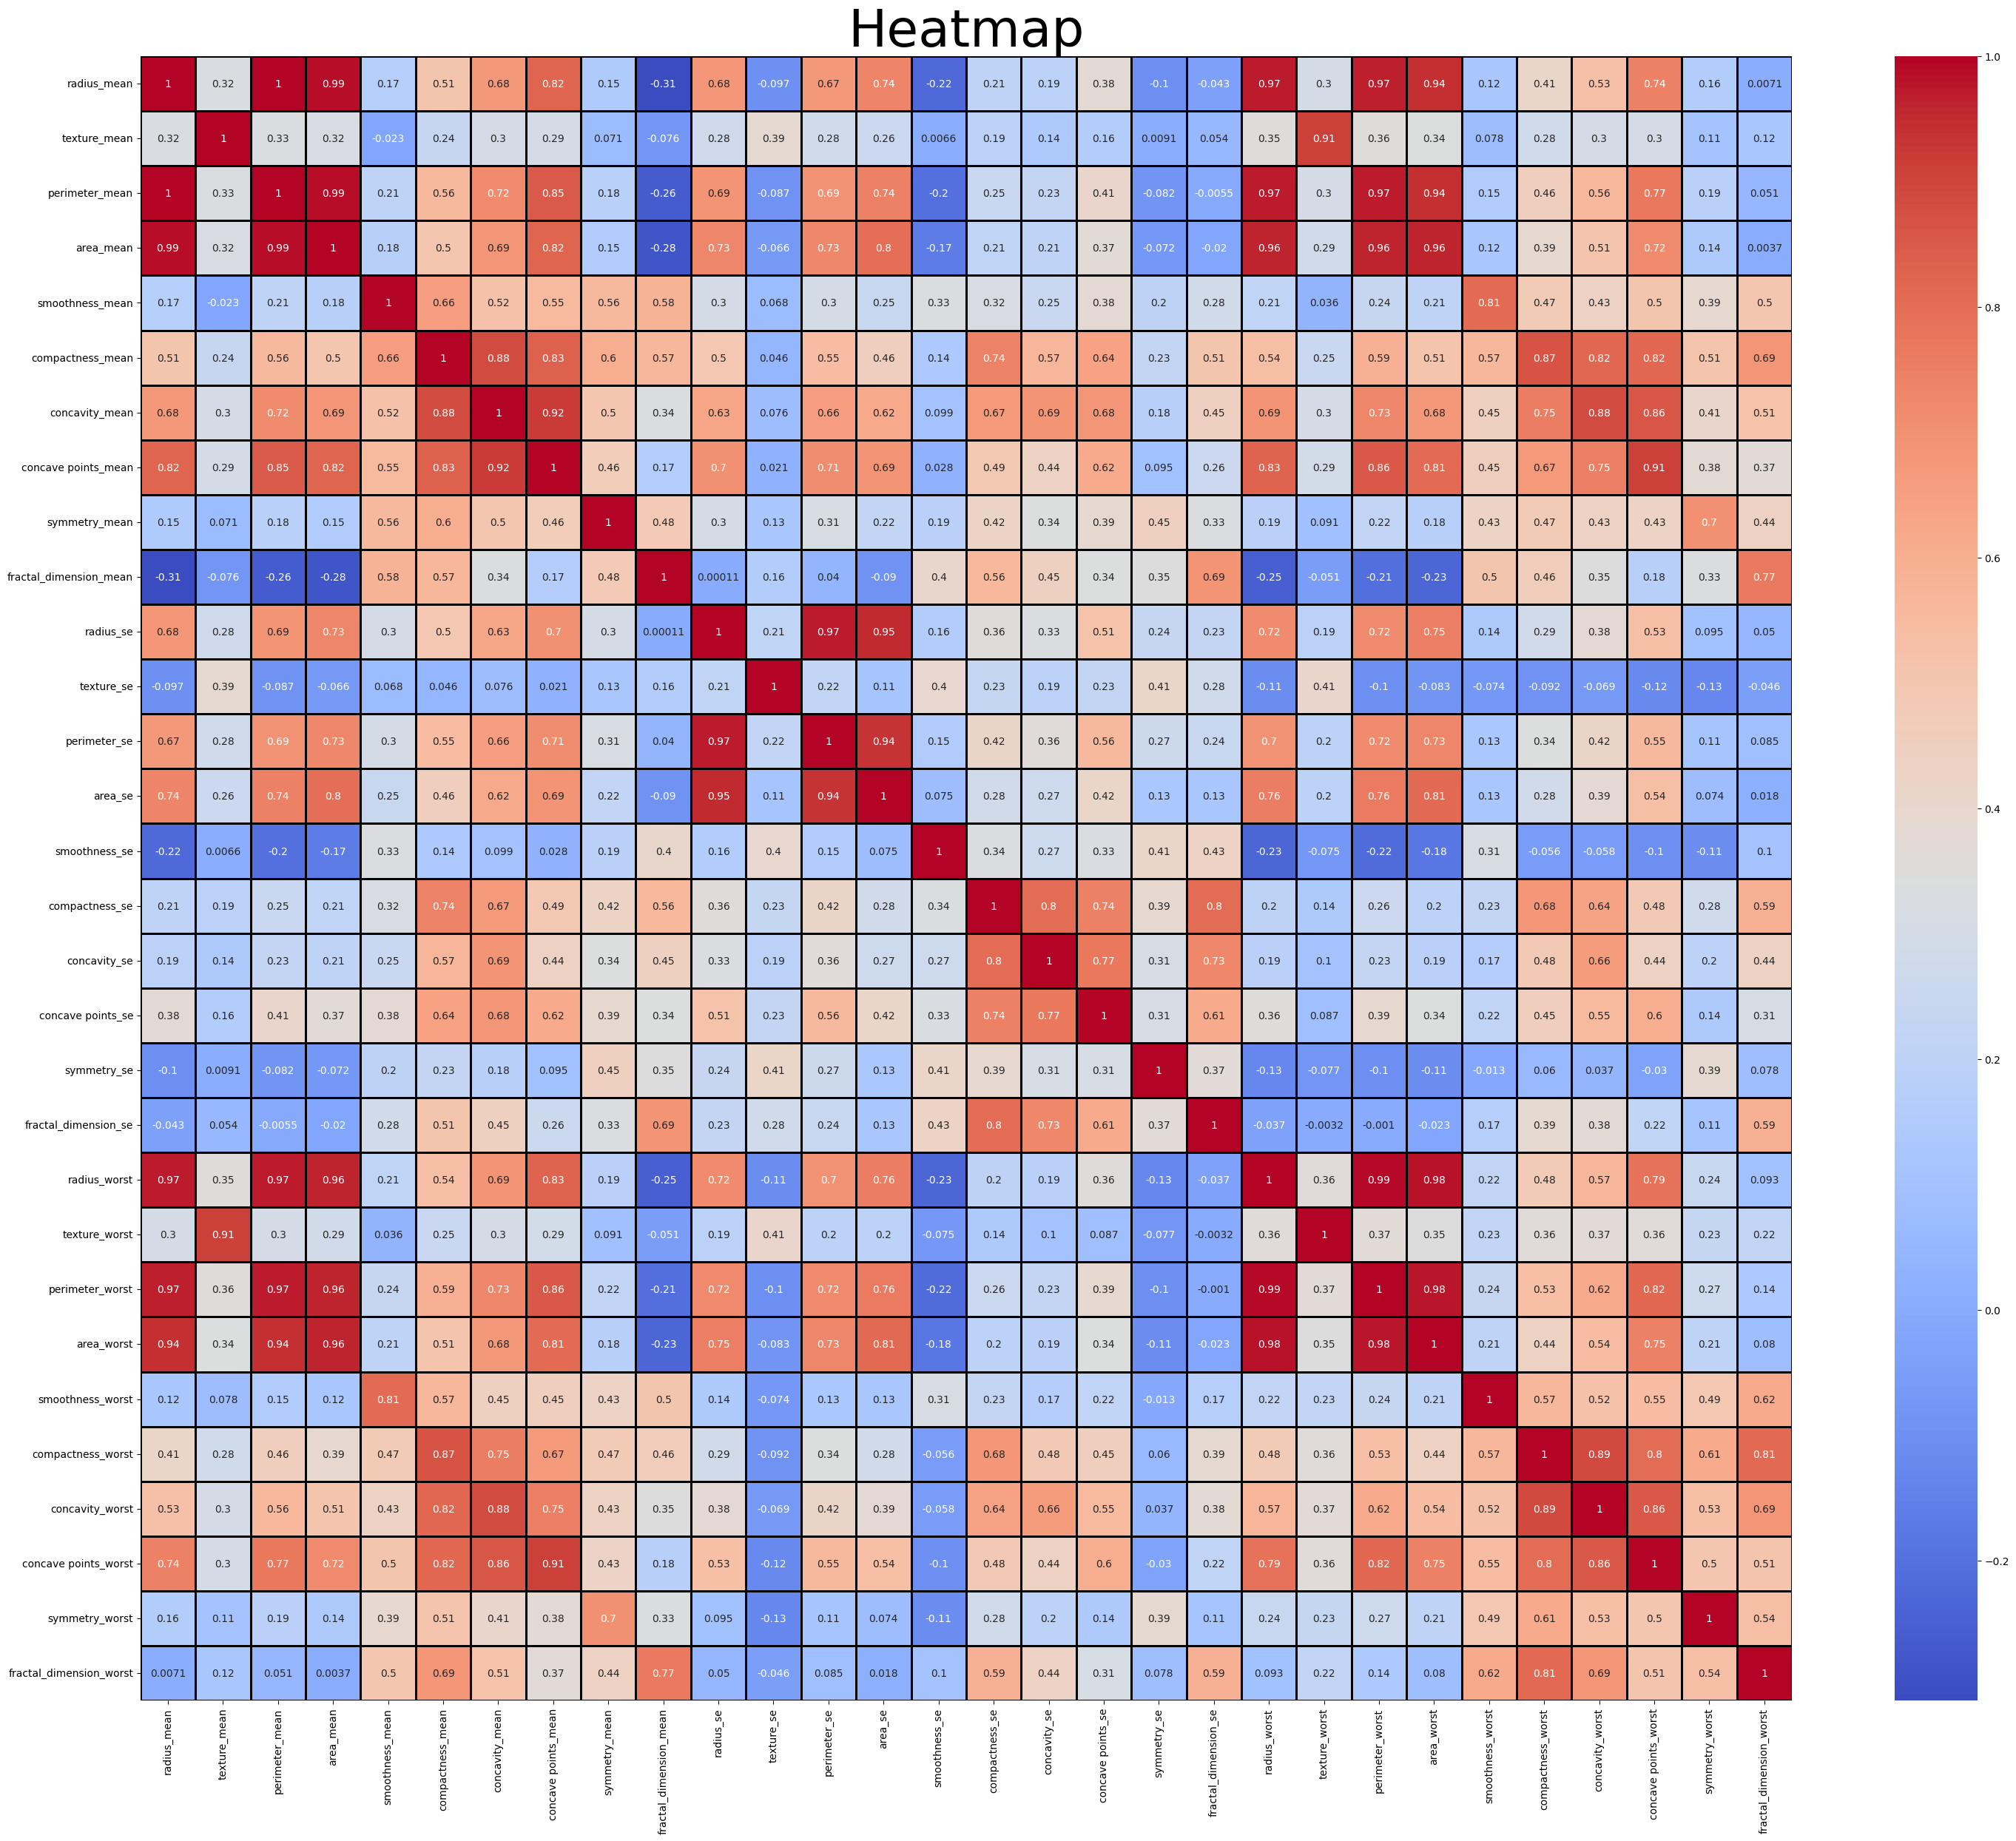

In [13]:
#Check the correlation and Standard deviation for all the numeric data
corr = df.corr()

"""
we use correlation to to show us the  direction of the relationship,
the form (shape) of the relationship, and the degree (strength) of the relationship between two variables.
The closer we get to the red color we can conclude that the following :
1-direct relationship
2-positive correlation (positive slope)

The closer we get to the blue color we can conclude that the following :
2-inverse relationship
2-negative correlation (negative slope)
"""

#visualization of corr using heatmap
plt.figure(figsize=(30,25))
sns.heatmap(corr,annot=True,cmap='coolwarm',linecolor='black',linewidths=2)
plt.title("Heatmap",fontdict={'fontsize': 50})
plt.tight_layout()


<Figure size 2000x1700 with 0 Axes>

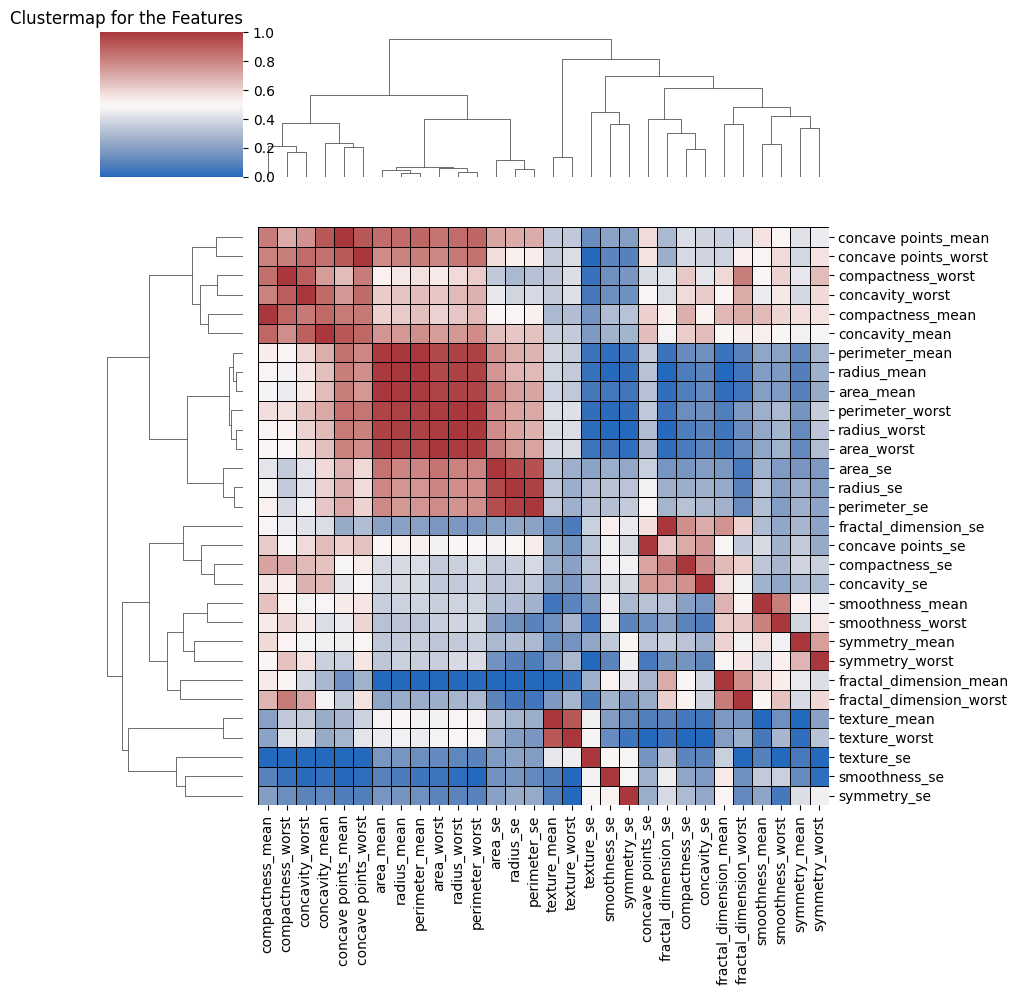

In [14]:
from seaborn._core.properties import FontSize
#Clustermap
plt.figure(figsize=(20,17))
sns.clustermap(corr,standard_scale=1,cmap='vlag',linecolor='black',linewidths=0.5)
plt.title("Clustermap for the Features",loc='right')
plt.tight_layout()
plt.show()

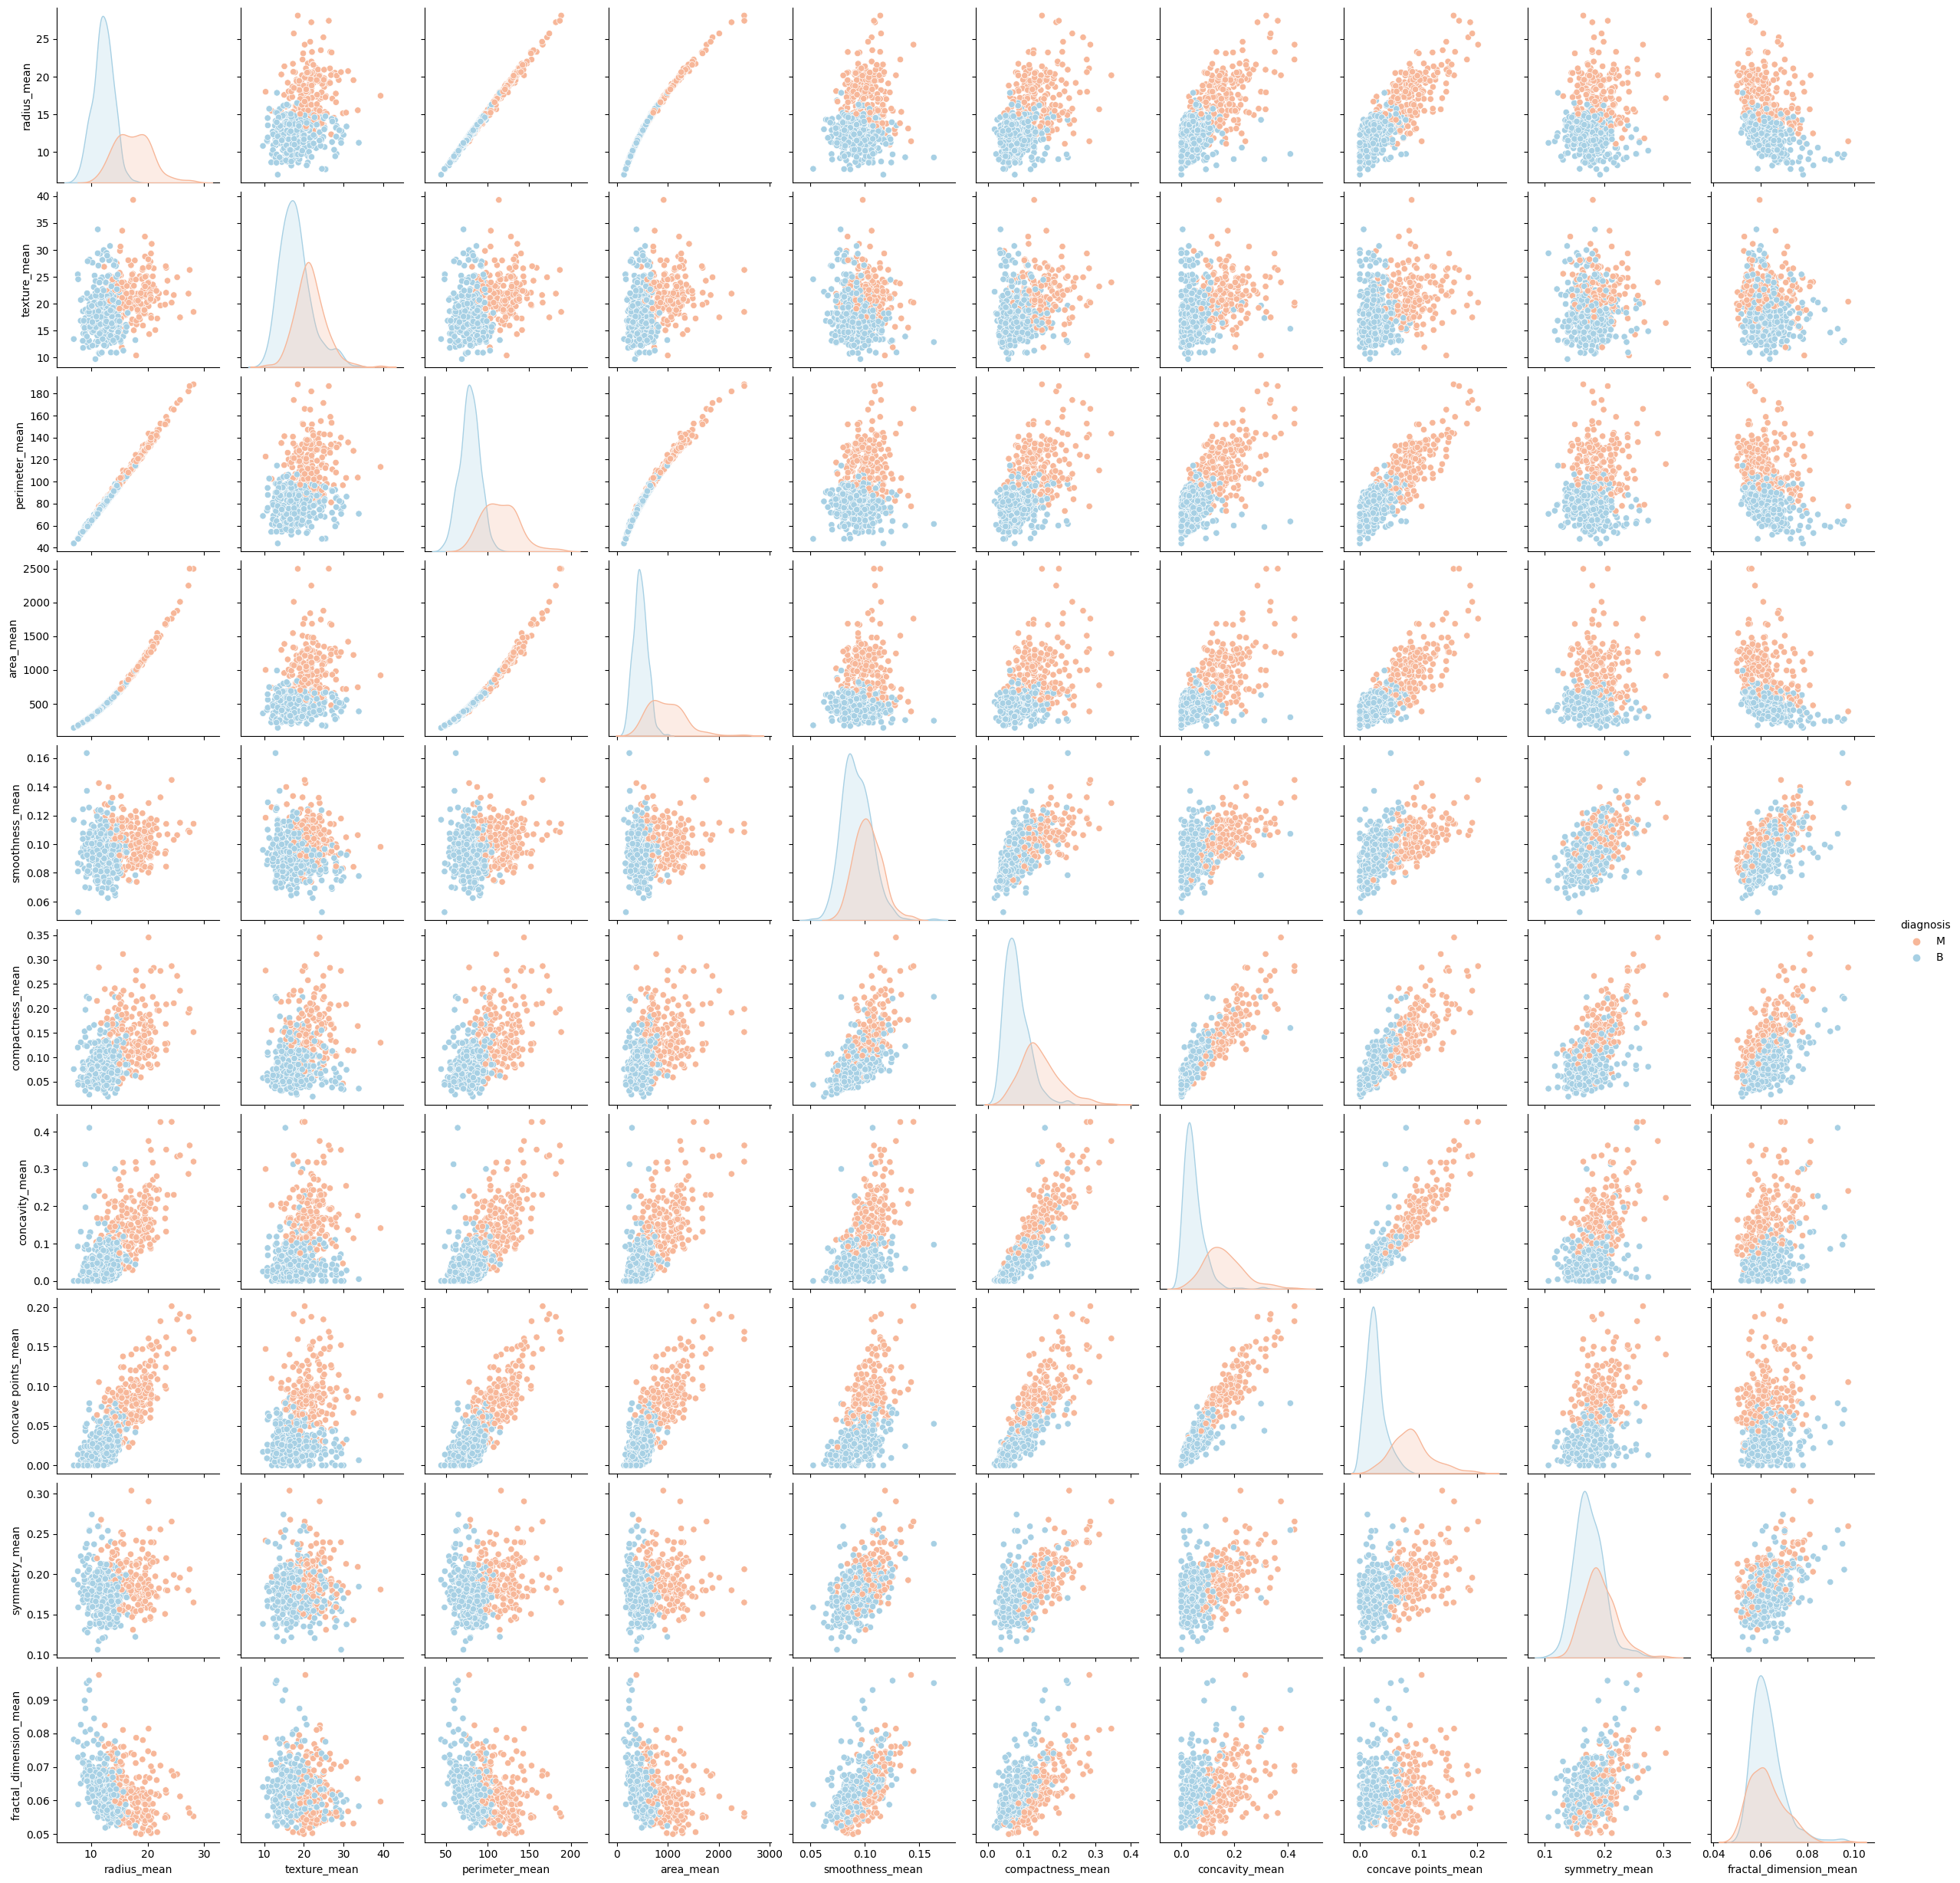

In [15]:
#Using pairplot to show the relationship between some numerical features
cols = ['diagnosis',
        'radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']

sns.pairplot(data=df[cols], hue='diagnosis', palette='RdBu')

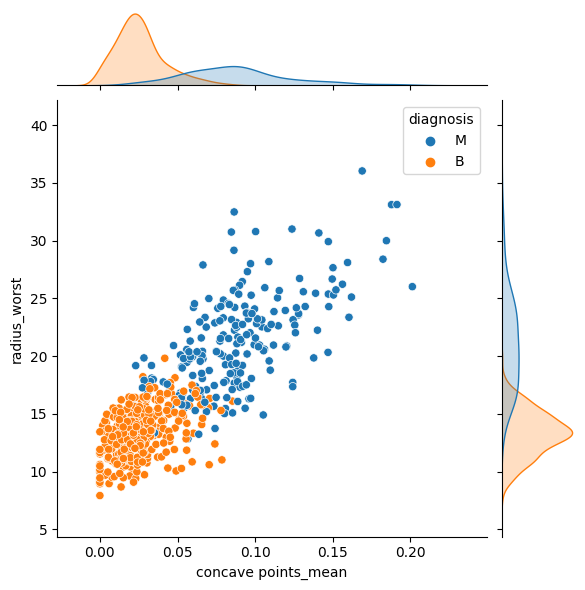

In [16]:
#Applying jointplot over two features
sns.jointplot(x='concave points_mean',y='radius_worst',data=df,hue='diagnosis')
plt.show()


<Axes: xlabel='radius_mean', ylabel='Count'>

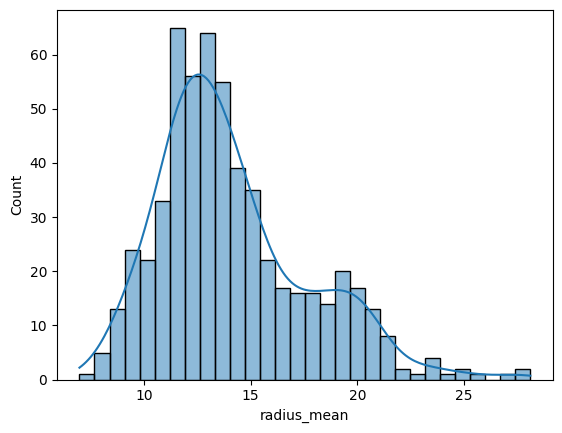

In [17]:
#Applying histogram for one of the features
sns.histplot(df['radius_mean'],bins=30,kde=True)

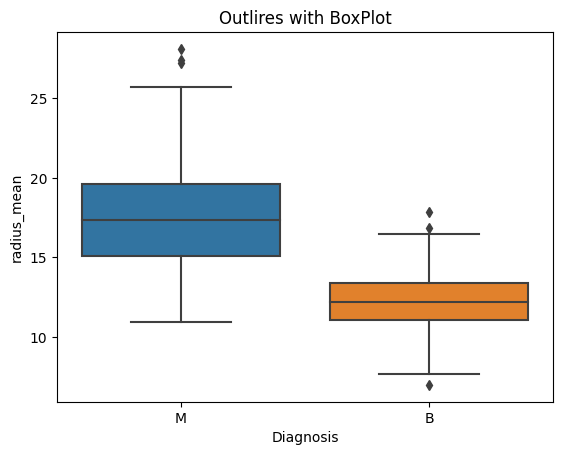

In [18]:
#Using Boxplot to discover the outlires of data
sns.boxplot(data=df,x='diagnosis',y='radius_mean')
plt.title("Outlires with BoxPlot")
plt.xlabel("Diagnosis")
plt.ylabel("radius_mean")
plt.show()

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

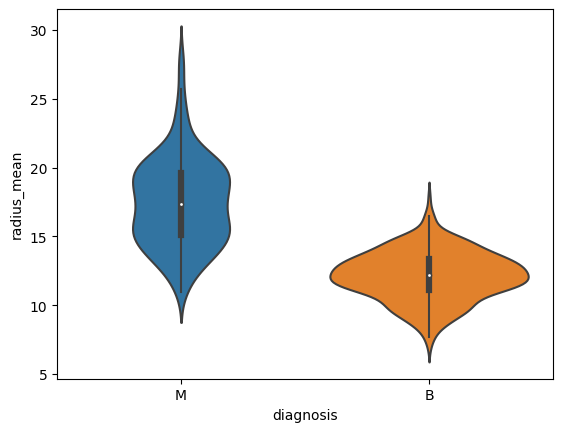

In [19]:
sns.violinplot(x='diagnosis',y='radius_mean',data=df)

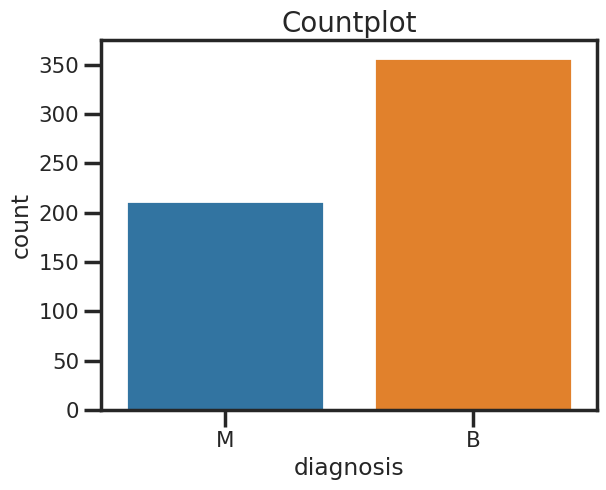

In [20]:
#Countplot for displaying the number of unique values at diagnosis column

sns.set_context('poster',font_scale=0.7)
sns.set_style('ticks')
sns.countplot(x='diagnosis',data=df)
plt.title("Countplot",fontdict={'fontsize':20})
plt.show()


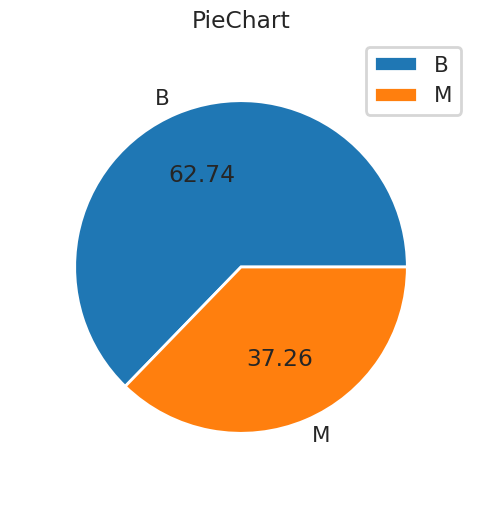

In [21]:
#Piechart to discover the diagnosis column
plt.figure(figsize=(10,6))
label = ['B','M']
plt.pie(df.value_counts('diagnosis'),labels=label,radius=0.9,autopct='%.2f')
plt.title("PieChart")
plt.legend()
plt.show()

<Figure size 700x700 with 0 Axes>

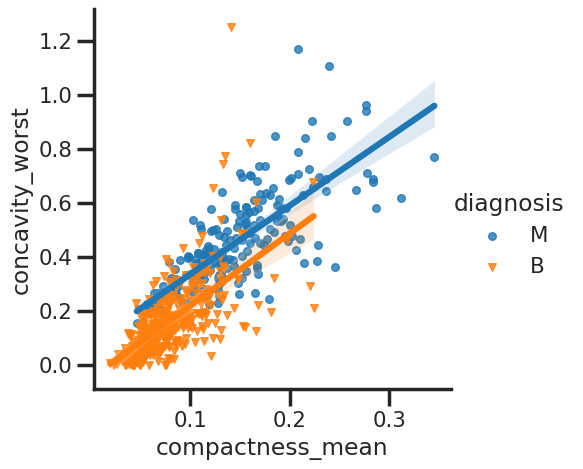

In [22]:
#Applying  lmplot to show us example of regression analysis between two features
plt.figure(figsize=(7,7))
sns.lmplot(data=df,x='compactness_mean',y='concavity_worst',hue='diagnosis',markers=['o','v'],scatter_kws={'s':30})
plt.show()

<Axes: xlabel='compactness_mean', ylabel='concave points_mean'>

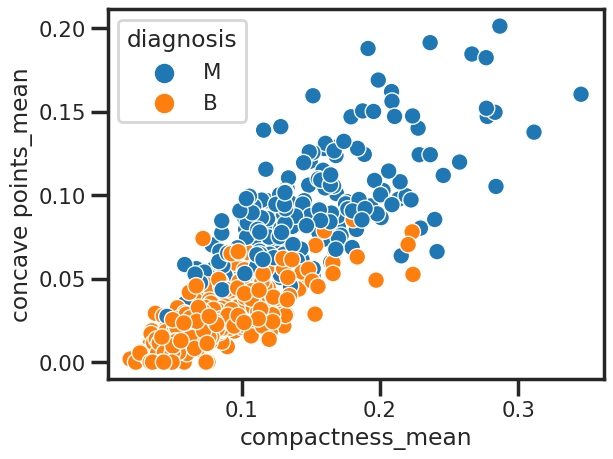

In [23]:
#Applying scatterplot to show us example of regression analysis
sns.scatterplot(data=df,x='compactness_mean',y='concave points_mean',hue='diagnosis')

#Data Splitting and Preprocessing

###Encoding

In [24]:
#applyin label encoder on dependent variable (diagnosis)
le = LabelEncoder()
df['diagnosis'] =le.fit_transform(df['diagnosis'])
df['diagnosis'].unique()

array([1, 0])

###Data Splitting

In [25]:
#Splitting the data into x and y
x = df.drop(['diagnosis'],axis=1)
y=df['diagnosis']
x.head(1)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38           122.8     1001.0           0.1184   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.2776          0.3001               0.1471         0.2419   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33            184.6   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                   0.1189  

[1 rows x 30 columns]

In [26]:
#Splitting data into (train,valid,test) data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.10,random_state=42)

###Data Standardization

In [27]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

# Binary Logistic Regression

In [28]:
#Building the model
regressor = LogisticRegression()
regressor.fit(x_train,y_train)

LogisticRegression()

###Check Overvitting

In [48]:
#Make prediction on training data
y_pred_train = regressor.predict(x_train)
"""
Here we use Recall in evaluation due to the fact,
this is disease prediction model.
"""


recall_logistic_train=recall_score(y_train,y_pred_train)
print(f'f1=  {recall_logistic_train}')

f1=  0.9777777777777777


In [49]:
#Make prediction on validation data
y_pred_valid = regressor.predict(x_valid)
"""
Here we use Recall in evaluation due to the fact,
this is disease prediction model.
"""
recall_logistic_valid=recall_score(y_valid,y_pred_valid)
print(f'f1=  {recall_logistic_valid}')

f1=  0.9285714285714286


In [50]:
#Make prediction on testing data
y_pred_test = regressor.predict(x_test)
"""
Here we use Recall in evaluation due to the fact,
this is disease prediction model.
"""
recall_logistic=recall_score(y_test,y_pred_test)
print(f'f1=  {recall_logistic}')

f1=  0.9841269841269841


###Evaluation of Logistic Regression

In [32]:
accuracy_logistic =accuracy_score(y_test,y_pred_test)
recall_logistic=recall_score(y_test,y_pred_test)
precision_logistic=precision_score(y_test,y_pred_test)
SCORE_logistic = f1_score(y_test,y_pred_test)



In [33]:
print(f'accuracy= {accuracy_logistic}')
print(f'recall= {recall_logistic}')
print(f'precision= {precision_logistic}')
print(f'f1= {SCORE_logistic}')

accuracy= 0.9824561403508771
recall= 0.9841269841269841
precision= 0.96875
f1= 0.9763779527559054


In [34]:
#Confusion Matrix
cf=confusion_matrix(y_test,y_pred_test)
cf

array([[106,   2],
       [  1,  62]])

<Axes: >

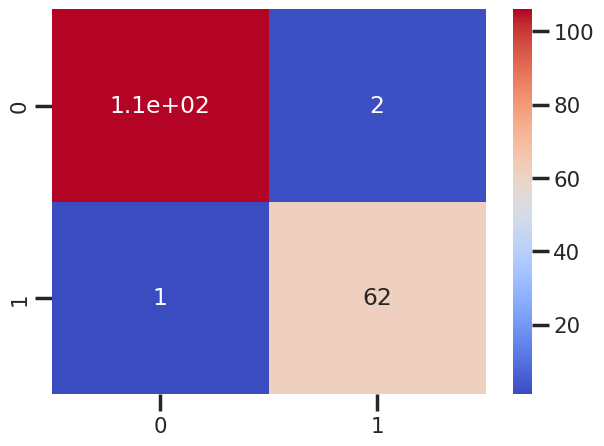

In [35]:
#Visualising Confusion Matrix using heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cf,annot=True,cmap='coolwarm')

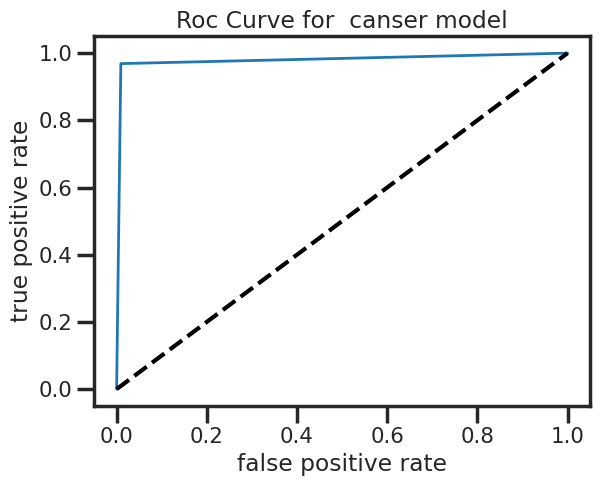

In [52]:
#Roc curve
"""
I think here if we look carefully at roc_curve
we can eaisly notice that this is kind of an
optimal solution for our prediction model.
"""

fpr,tpr,thresholds =roc_curve(y_pred_test,y_test)
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.title('Roc Curve for  canser model')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()


In [37]:
#Area under curve
auc=roc_auc_score(y_pred_test,y_test)
print(f"the result of auc = {auc*100}%")

the result of auc = 97.97021028037382%


#Decision Tree Classification

In [38]:
#Build the model
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

###Check overfitting

In [39]:
#Make prediction on training data
y_pred_train_1 = classifier.predict(x_train)
#Recall
recall_tree_train=recall_score(y_train,y_pred_train_1)
print(f'f1=  {recall_tree_train}')

f1=  1.0


In [40]:
#Make prediction on validation data
y_pred_valid_1 = classifier.predict(x_valid)
#Recall
recall_tree_valid=recall_score(y_valid,y_pred_valid_1)
print(f'f1=  {recall_tree_valid}')

f1=  1.0


In [41]:
#Make prediction on testing data
y_pred_test_1=classifier.predict(x_test)
#Recall
recall_tree=recall_score(y_test,y_pred_test_1)
print(recall_tree)

0.9523809523809523


###Evaluation of Decision Tree

In [42]:
accuracy_tree =accuracy_score(y_test,y_pred_test_1)
recall_tree=recall_score(y_test,y_pred_test_1)
precision_tree=precision_score(y_test,y_pred_test_1)
SCORE_TREE = f1_score(y_test,y_pred_test_1)


In [43]:
print(f'accuracy= {accuracy_tree}')
print(f'recall= {recall_tree}')
print(f'precision= {precision_tree}')
print(f'f1= {SCORE_TREE}')

accuracy= 0.9298245614035088
recall= 0.9523809523809523
precision= 0.8695652173913043
f1= 0.909090909090909


In [44]:
#Confusion Matrix
cf_tree=confusion_matrix(y_test,y_pred_test_1)
cf_tree

array([[99,  9],
       [ 3, 60]])

<Axes: >

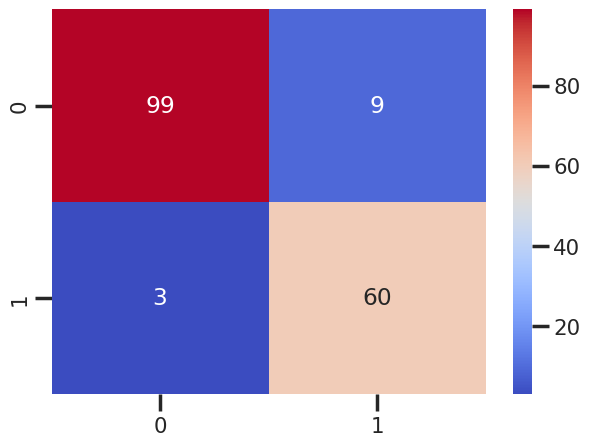

In [45]:
#Visualising Confusion Matrix using heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cf_tree,annot=True,cmap='coolwarm')

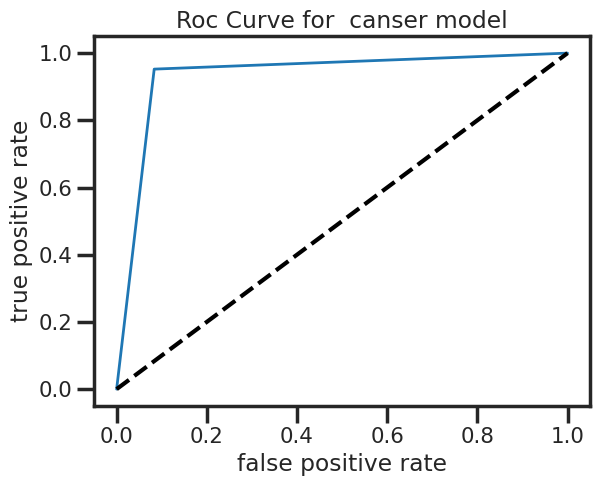

In [51]:
#Roc curve
"""
from this chart we can obviously notice that,
this is not the optimal solution for our model.
"""
fpr,tpr,thresholds =roc_curve(y_test,y_pred_test_1)
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.title('Roc Curve for  canser model')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

In [47]:
#Area under curve
auc_tree=roc_auc_score(y_test,y_pred_test_1)
print(f"the result of auc = {auc*100}%")

the result of auc = 97.97021028037382%
